# Practical Econometrics II: Midterm I (<b style="color:blue">R</b>)

# 2023-04-13

### <i> <b style="color:red">Stefan Ristikj</b> </i>


---
---

## Requirements

- All of the answers must be explained and justified by either tests, model output, or charts;
- If you are testing a hypothesis - write down the **null** and the **alternative** hypothesis; Also **clearly** state the results of the test.
- If you estimate a model, or carry out a test and make some conclusions based on it - indicate **the reason** that these conclusions are based on (e.g. $p$-value, $t$-statistic, residuals, plots, etc. some other test results, model functional form, coefficient interpretation, etc.);
- You should understand what your code does and how it works. You are also responsible that your code **is correctly working**.
- Plots, Charts, etc. should be readable, with clear explanations - either by including a legend or writing a couple of sentences explaining which colors correspond to which data/models/forecasts of interest. **Do not be afraid to comment the charts** - what do you see from the plots - is everything as you expect, do you identify any **potential** problems?
- **Important!** Do not forget to use `set.seed(STUDENT_CODE)` if you need to sample or simulate data, where `STUDENT_CODE` is **your** student code.

- Your solutions have to be coherent - i.e. if one task requires to select the best model, then the next task requires to write down the equation and the third one requires to carry out some model testing - clearly state what model you chose, **and why**, and use **only that model**, **unless the tasks specify otherwise**.

- <b style="color:red">If a task REQUIRES you to provide comments on the results - providing only code without explanation of the results does NOT count as a solution.</b>

----
----

## Some Recommended Libraries

You may need the following libraries:

In [1]:
rm(list = ls())
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,617399,33.0,1313560,70.2,1313560,70.2
Vcells,1108911,8.5,8388608,64.0,1632695,12.5


In [3]:
install.packages("lubridate")

Installing package into 'C:/Users/risti/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependency 'timechange'




package 'timechange' successfully unpacked and MD5 sums checked
package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\risti\AppData\Local\Temp\Rtmpi8vcKD\downloaded_packages


In [5]:
install.packages("data.table")

Installing package into 'C:/Users/risti/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\risti\AppData\Local\Temp\Rtmpi8vcKD\downloaded_packages


In [7]:
install.packages("rugarch")

Installing package into 'C:/Users/risti/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'rugarch' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\risti\AppData\Local\Temp\Rtmpi8vcKD\downloaded_packages


In [9]:
install.packages("PerformanceAnalytics")

Installing package into 'C:/Users/risti/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'PerformanceAnalytics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\risti\AppData\Local\Temp\Rtmpi8vcKD\downloaded_packages


In [11]:
install.packages("FinTS")

Installing package into 'C:/Users/risti/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'FinTS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\risti\AppData\Local\Temp\Rtmpi8vcKD\downloaded_packages


In [12]:
suppressPackageStartupMessages({
  suppressMessages({
    library(forecast)
    library(ggplot2)
    library(lubridate)
    library(data.table)    
    library(quantmod)
    library(rugarch)
    library(PerformanceAnalytics)
    library(FinTS)
    library(magrittr)
  })
})

Warning message:
"package 'FinTS' was built under R version 4.2.3"


You can change the dimensions of plots by midifying the width and height in the code below:

In [13]:
options(repr.plot.width = 12)
options(repr.plot.height = 6)

You can also add in any other libraries that you will be using.

In [ ]:
suppressPackageStartupMessages({
  suppressWarnings({
    # Add any additional libraries here
  })
})

## Function to get the data

Below is an `.R` code file, which will be used to generate equations and data, based on your student code:

In [14]:
source("http://web.vu.lt/mif/a.buteikis/wp-content/uploads/2023/04/MID2023_I.R")

## Specify your student code

**Replace** `YOUR_STUDENT_CODE` with your student code and run the following code to get your data sample:

In [15]:
STUDENT_CODE = 2309140

Your student code is a unique 7-digit code. The start of the student code depends on the year and study programme, with the last 4 digits being unique to each student. For example:

- `181xxxx` for VU Econometrics students, who enrolled in 2018;
- `191xxxx` for VU Econometrics students, who enrolled in 2019;
- etc.
- `210xxxx`, `220xxxx`, etc. for ERASMUS/international students;

# **Task Set 1: Time series simulation**

Run the code below to get the equation for this exercise set:

In [16]:
get_equation(STUDENT_CODE)

[1] "Student code: 2309140"
[1] "Equation: (1-0.4L+0.2L^2)Y_t = 0.4 + (1-0.4L)e_t"
[1] "with: e_t ~ N(0, 1) and T = 150"


Carry out the tasks below:

- **(A)** What kind of models are specified in the equations - $\rm AR(p)$, $\rm MA(q)$ or $\rm ARMA(p,q)$ and what are the lag orders $p$ and $q$? Is the process stationary and invertible?
- **(B)** Simulate the series using an additional $50$ observation as burn-in observations.
- **(C)** Plot the sample $\rm ACF$ and $\rm PACF$ - what can you say about the process using only these plots? Carry out an `Ljung-Box` test.
- **(D)** Use `auto.arima` to select the best (in terms of $\rm BIC$) model - what kind of model is it? Analyse the residuals of your model - are they autocorrelated?
- **(E)** Use your model and forecast $h = 5$ periods into the future.

*Solutions*:

**(A) What kind of models are specified in the equations - AR(p), MA(q) or ARMA(p,q) and what are the lag orders 𝑝 and 𝑞? Is the process stationary and invertible?**

The equation specifies an ARMA(p, q) model, with lag orders p=2 and q=1. 

In [17]:
print(paste0("Equation: ", polynom::polynomial(coef = c(1, -0.4, 0.2))))

[1] "Equation: 1 - 0.4*x + 0.2*x^2"


In [18]:
sprintf("Roots: %s", polyroot(c(1, -0.4, 0.2)))

[1] "Roots: 1+2i" "Roots: 1-2i"

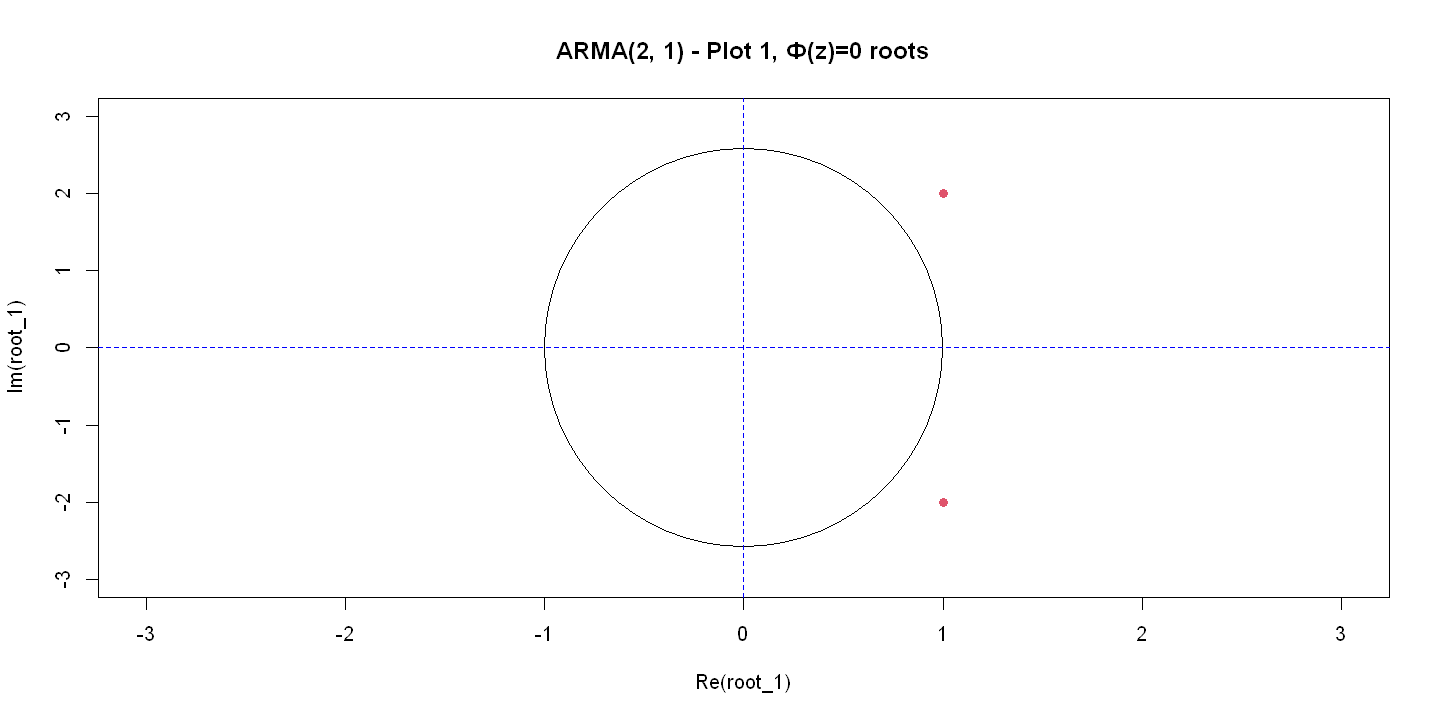

In [26]:
root_1 <- polyroot(c(1, -0.4, 0.2))

plot(root_1, col = 2, pch = 16, xlim = c(-3, 3), ylim = c(-3, 3), main = "ARMA(2, 1) - Plot 1, Ф(z)=0 roots")

symbols(0, 0, circles = 1, add = T, inches = F)

abline(h = 0, col = "blue", lty = 2)
abline(v = 0, col = "blue", lty = 2)

The process is stationary because the Ф(z) = 0 roots are outside the unit circle (plot 1), and is invertible because the Θ(z) = 0 roots are also outside of the unit circle (plot 2).

In [21]:
sprintf("Roots: %s", polyroot(c(1, -0.4)))

[1] "Roots: 2.5+0i"

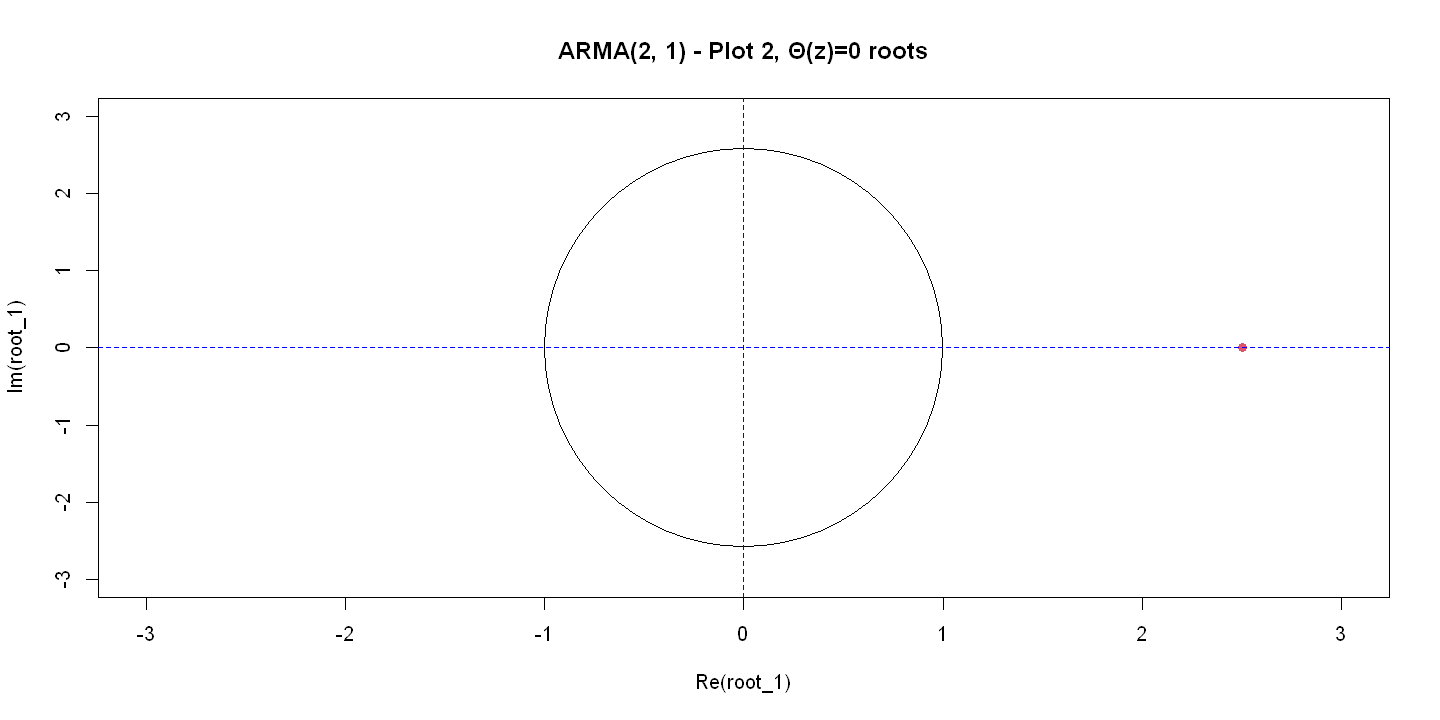

In [27]:
root_1 <- polyroot(c(1, -0.4))

plot(root_1, col = 2, pch = 16, xlim = c(-3, 3), ylim = c(-3, 3), main = "ARMA(2, 1) - Plot 2, Θ(z)=0 roots")

symbols(0, 0, circles = 1, add = T, inches = F)

abline(h = 0, col = "blue", lty = 2)
abline(v = 0, col = "blue", lty = 2)

**(B) Simulate the series using an additional 50 observation as burn-in observations.**

In [28]:
set.seed(STUDENT_CODE)

m <- 50
N <- 150
epsilon <- rnorm(mean = 0, sd = 1, n = N + m)

data <- 0.4 + epsilon[1]
data <- c(data, 0.4 * epsilon[1] + 0.4 + epsilon[2] - 0.4 * epsilon[1])
for(j in 3:(N+m))
{
    temp <- 0.4 * data[j-1] - 0.2 * data[j-2] + 0.4 + epsilon[j] - 0.4 * epsilon[j-1]
    data <- c(data, temp)
}
full_data <- data[-c(1:m)]

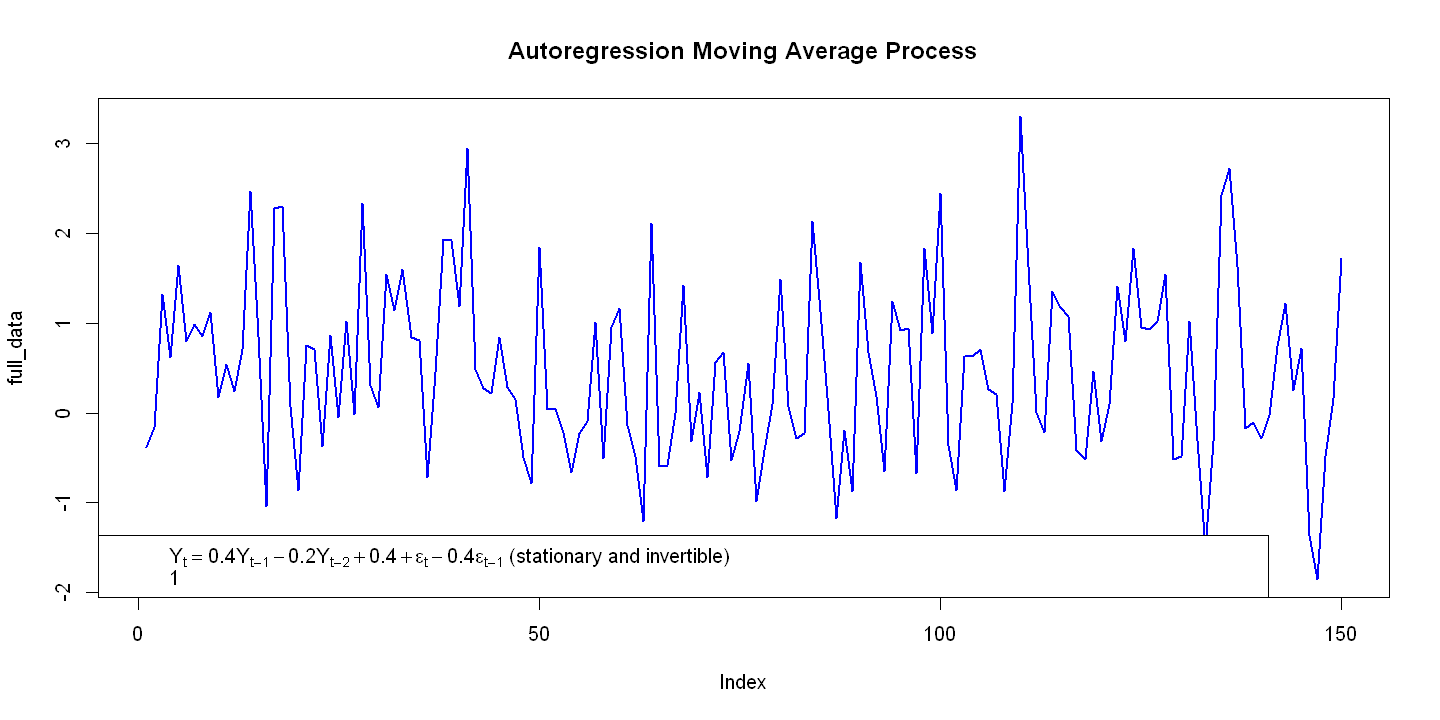

In [30]:
plot(full_data, type = "l", col = "blue", lwd = 2)
title("Autoregression Moving Average Process")
legend("bottomleft", legend = c(as.expression(bquote(Y[t]==0.4*Y[t-1]-0.2*Y[t-2]+0.4+epsilon[t]-0.4*epsilon[t-1]~"(stationary and invertible)")), lty = 1))

**(C) Plot the sample ACF and PACF - what can you say about the process using only these plots? Carry out an Ljung-Box test.**

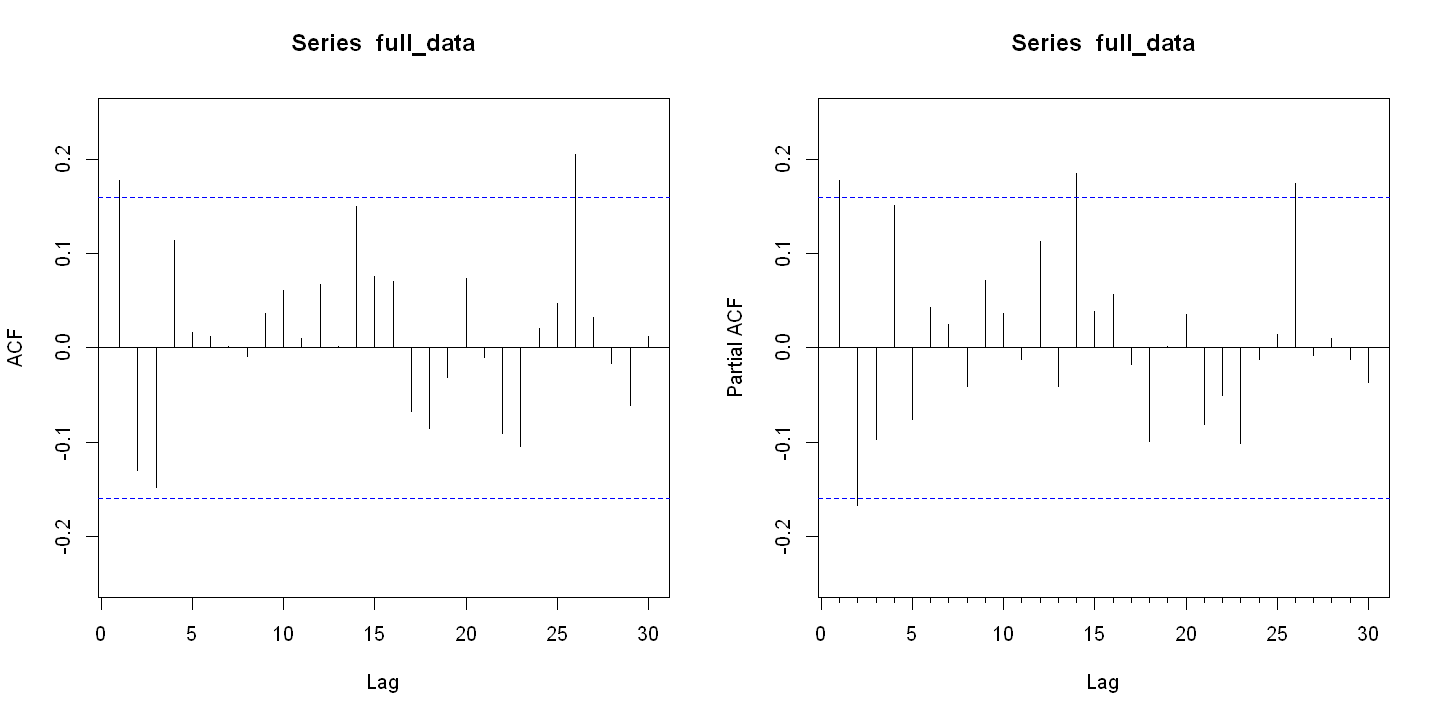

In [37]:
par(mfrow = c(1, 2))

forecast::Acf(full_data, lag.max=30)

forecast::Pacf(full_data, lag.max=30)

From the ACF and Partial ACF plots above, we can say that there is a drop-off at lag 4 in both plots, but the series does not show a big correlation between points at different lags, so the past values may not be very useful when predicting future values.

In [33]:
library(stats)

In [34]:
Box.test(x = full_data, lag = 10, type = "Ljung-Box")


	Box-Ljung test

data:  full_data
X-squared = 13.812, df = 10, p-value = 0.1817


**(D) Use auto.arima to select the best (in terms of BIC) model - what kind of model is it? Analyse the residuals of your model - are they autocorrelated?**

In [43]:
model <- auto.arima(full_data, trace=TRUE, ic="bic")
print(summary(model))


 ARIMA(2,0,2) with non-zero mean : 431.6686
 ARIMA(0,0,0) with non-zero mean : 428.4284
 ARIMA(1,0,0) with non-zero mean : 428.5741
 ARIMA(0,0,1) with non-zero mean : 427.1349
 ARIMA(0,0,0) with zero mean     : 454.9351
 ARIMA(1,0,1) with non-zero mean : 432.0153
 ARIMA(0,0,2) with non-zero mean : 431.7321
 ARIMA(1,0,2) with non-zero mean : 435.5645
 ARIMA(0,0,1) with zero mean     : 443.4736

 Best model: ARIMA(0,0,1) with non-zero mean 

Series: full_data 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1    mean
      0.2196  0.4729
s.e.  0.0800  0.0950

sigma^2 = 0.9255:  log likelihood = -206.05
AIC=418.1   AICc=418.27   BIC=427.13

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.0009026651 0.9555897 0.7722209 20.87757 307.5474 0.7877907
                    ACF1
Training set -0.01044076


As we can see from auto.arima summary, the best model would be ARIMA(0,0,1) with a non-zero mean. And the model residuals below confirm that, because the acf and pacf plots of the residuals look much more to white noise, with all values falling in the blue band. Also, the residuals have minor autocorrelation due to the random spikes at lags 14 and 16, but they fall under the blue band, and there is no drop-off point and no pattern indicating low to none autocorrelation so I think the model is solid overall.

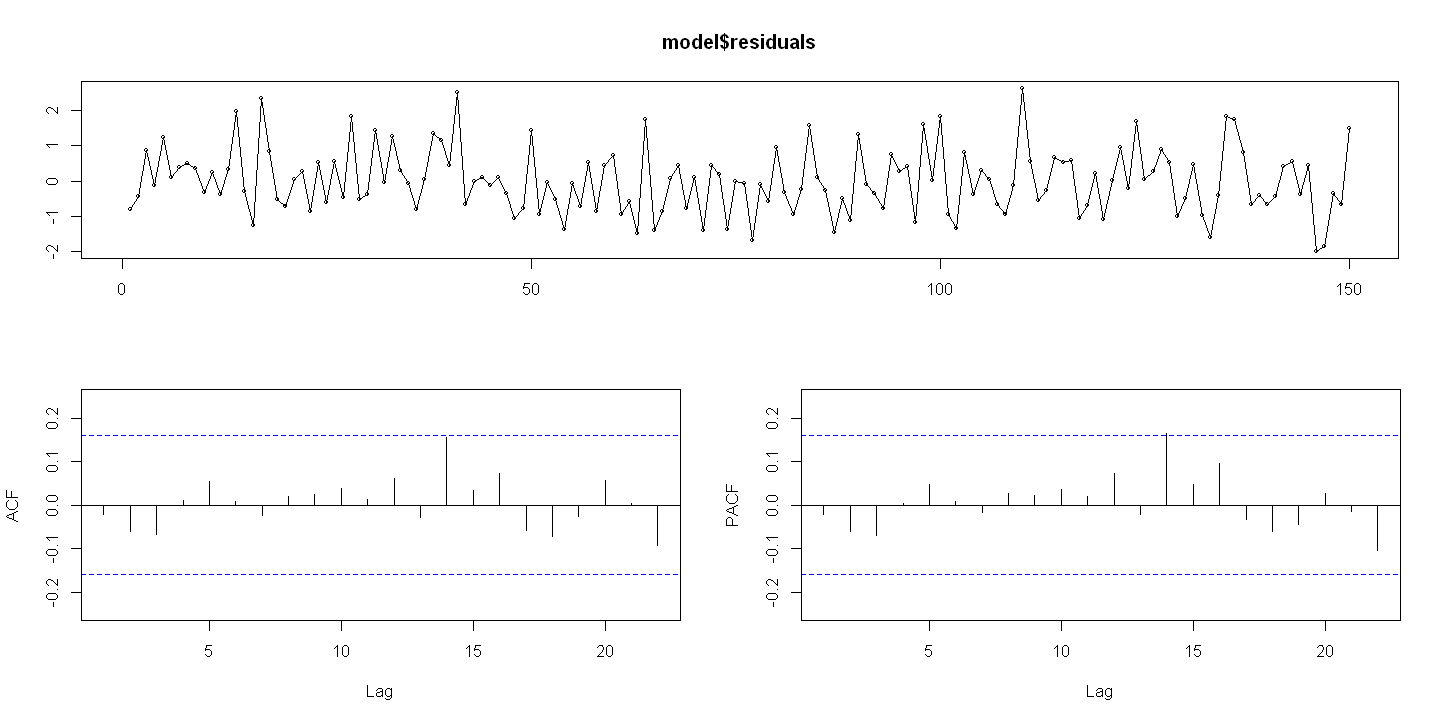

In [39]:
forecast::tsdisplay(model$residuals)

In [44]:
Box.test(x=model$residuals, lag=10, type="Ljung-Box")


	Box-Ljung test

data:  model$residuals
X-squared = 9.6321, df = 10, p-value = 0.4733


H0: The residuals of the model are white noise.
If we assume confidence level of 95%, given that the p-value is substantially bigger than 0.05 (significance level for 95% confidence), from the Ljung-Box test we can confirm the null hypothesis and say that the model residuals show no significant autocorrelation and can be considered as white noise.

**(E) Use your model and forecast ℎ=5 periods into the future.**

In [47]:
future_data <- forecast(model, h=5)

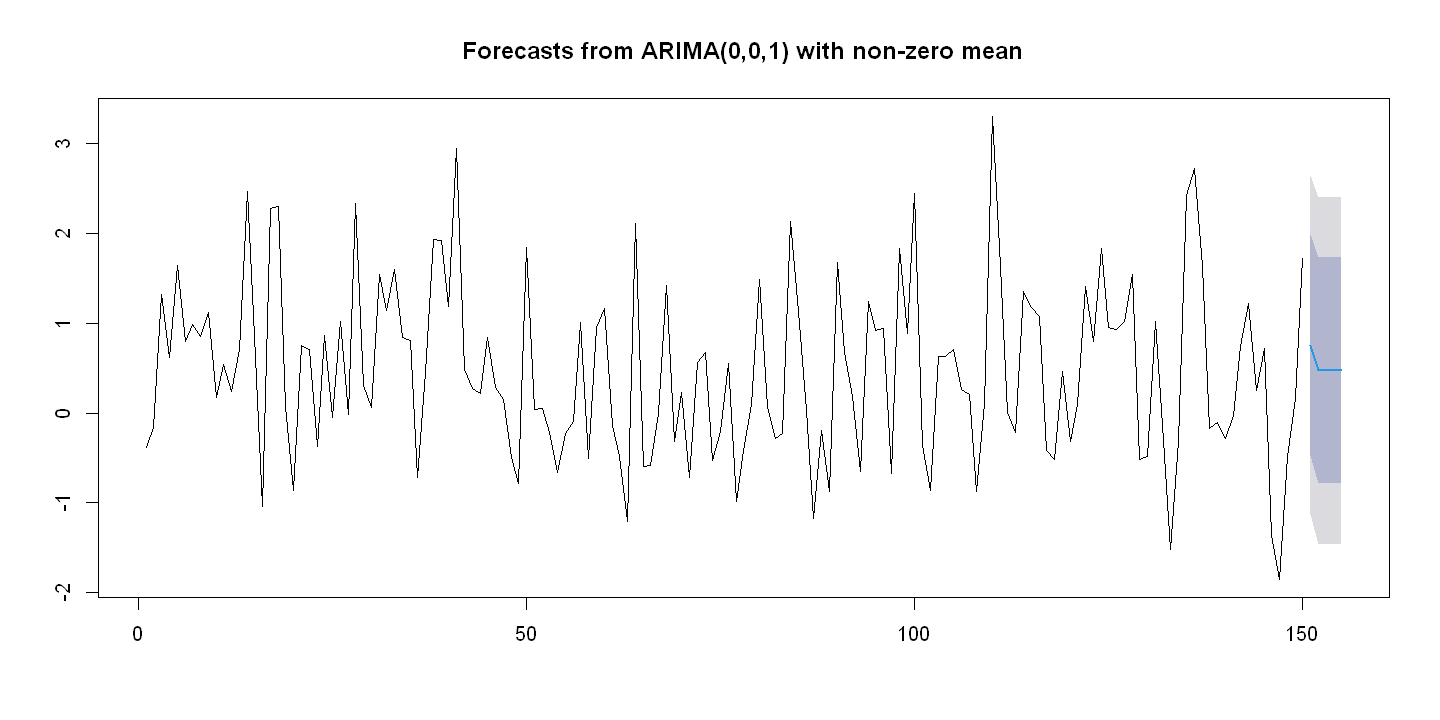

In [48]:
plot(future_data)

As we can see from the prediction, the model accounts for the current trend at the end of the actual observations but from the second observation converges towards the mean.

# **Task Set 2: Time series decomposition**

Run the code below to get a series based on your student code

In [49]:
DT_2 <- get_ts_dec(STUDENT_CODE)

In [52]:
print(head(DT_2))

          Y       date
1: 2.642516 1950-01-01
2: 5.737224 1950-02-01
3: 5.604169 1950-03-01
4: 4.829837 1950-04-01
5: 3.728421 1950-05-01
6: 1.351729 1950-06-01


In [53]:
print(DT_2)

              Y       date
  1:  2.6425158 1950-01-01
  2:  5.7372237 1950-02-01
  3:  5.6041689 1950-03-01
  4:  4.8298372 1950-04-01
  5:  3.7284206 1950-05-01
  6:  1.3517291 1950-06-01
  7: -1.3142413 1950-07-01
  8: -2.5112717 1950-08-01
  9: -4.2664038 1950-09-01
 10: -2.2534119 1950-10-01
 11:  0.2017314 1950-11-01
 12:  2.7473540 1950-12-01
 13:  4.7403152 1951-01-01
 14:  7.0090151 1951-02-01
 15:  7.4777484 1951-03-01
 16:  8.2030944 1951-04-01
 17:  5.5596688 1951-05-01
 18:  2.9608673 1951-06-01
 19:  1.8289253 1951-07-01
 20: -0.1639283 1951-08-01
 21: -1.0285300 1951-09-01
 22:  0.4852535 1951-10-01
 23:  2.0832199 1951-11-01
 24:  4.3163680 1951-12-01
 25:  7.7185186 1952-01-01
 26:  9.3317131 1952-02-01
 27: 10.3118967 1952-03-01
 28:  9.6655941 1952-04-01
 29:  7.4989720 1952-05-01
 30:  5.8375138 1952-06-01
 31:  3.4799772 1952-07-01
 32:  2.6815651 1952-08-01
 33:  1.3351370 1952-09-01
 34:  3.0748617 1952-10-01
 35:  4.5581817 1952-11-01
 36:  6.6668325 1952-12-01
 

Carry out the tasks below:

- **(A)** Transform your series into a time series object - make sure to specify the **frequency**, start and end dates. Then examine the series plot,as well as the $\rm ACF$ and $\rm PACF$ charts - is trend and seasonality present in your series?
- **(B)** Decompose the time series by removing the trend and seasonal components using a method **which allows forecasting** of these components.
- **(C)** Examine the residuals and verify that there is no more trend and seasonality. Are the residuals autocorrelated?
- **(D)** If the residuals are autocorrelated - estimate an appropriate model for the residuals. Check whether your specified model captures all of the autocorrelation of the residuals.
- **(E)** Predict the trend, seasonal and remainder components **2 years** into the future. Combine these components and plot them along with the historical series values.

*Solutions*:

**(A) Transform your series into a time series object - make sure to specify the frequency, start and end dates. Then examine the series plot, as well as the ACF and PACF charts - is trend and seasonality present in your series?**

In [57]:
DT_2 <- ts(DT_2, start=c(1950, 01, 01), end=c(1958, 04, 01), freq=12)

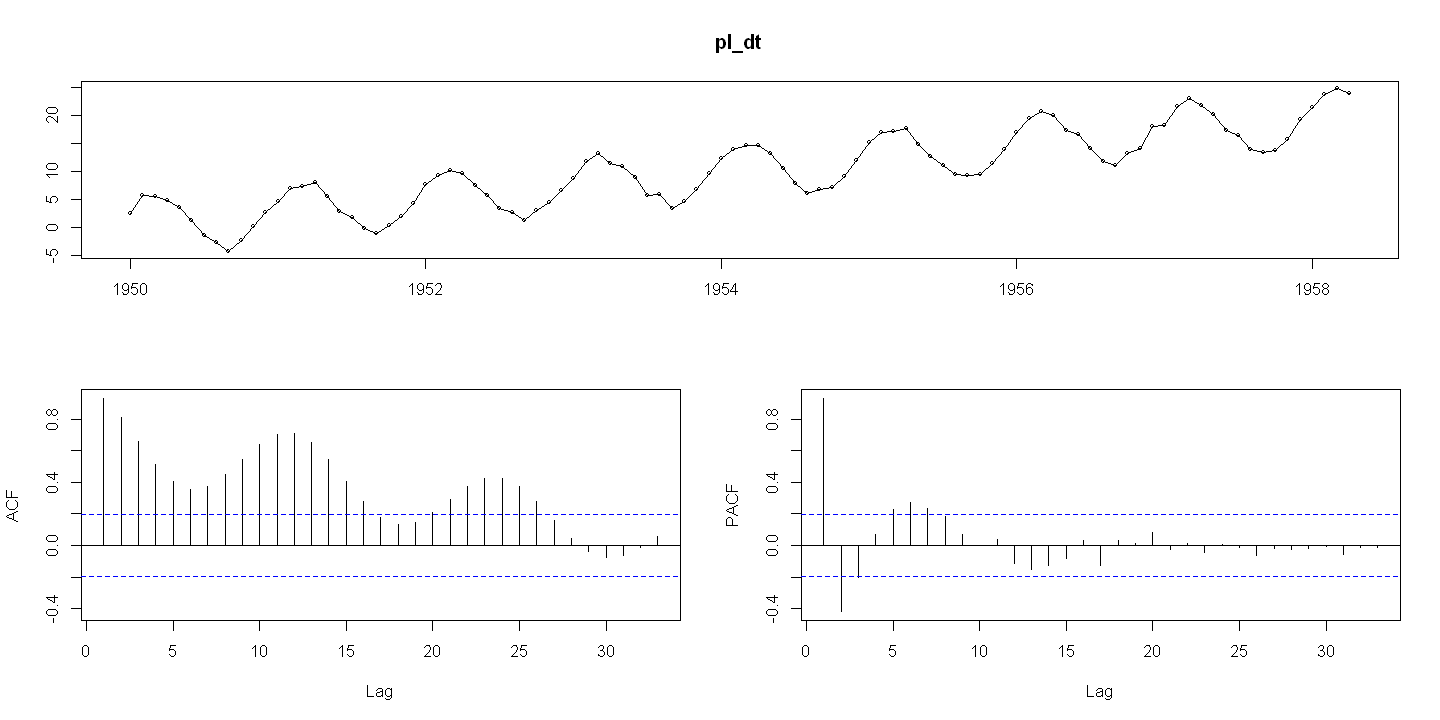

In [70]:
pl_dt <- DT_2[,-2]
tsdisplay(pl_dt)

As we can see from the plots above, the clearly visible oscillations in the acf plot indicate seasonality which is pretty strong, and the decline indicates a trend over time.

**(B) Decompose the time series by removing the trend and seasonal components using a method which allows forecasting of these components.**

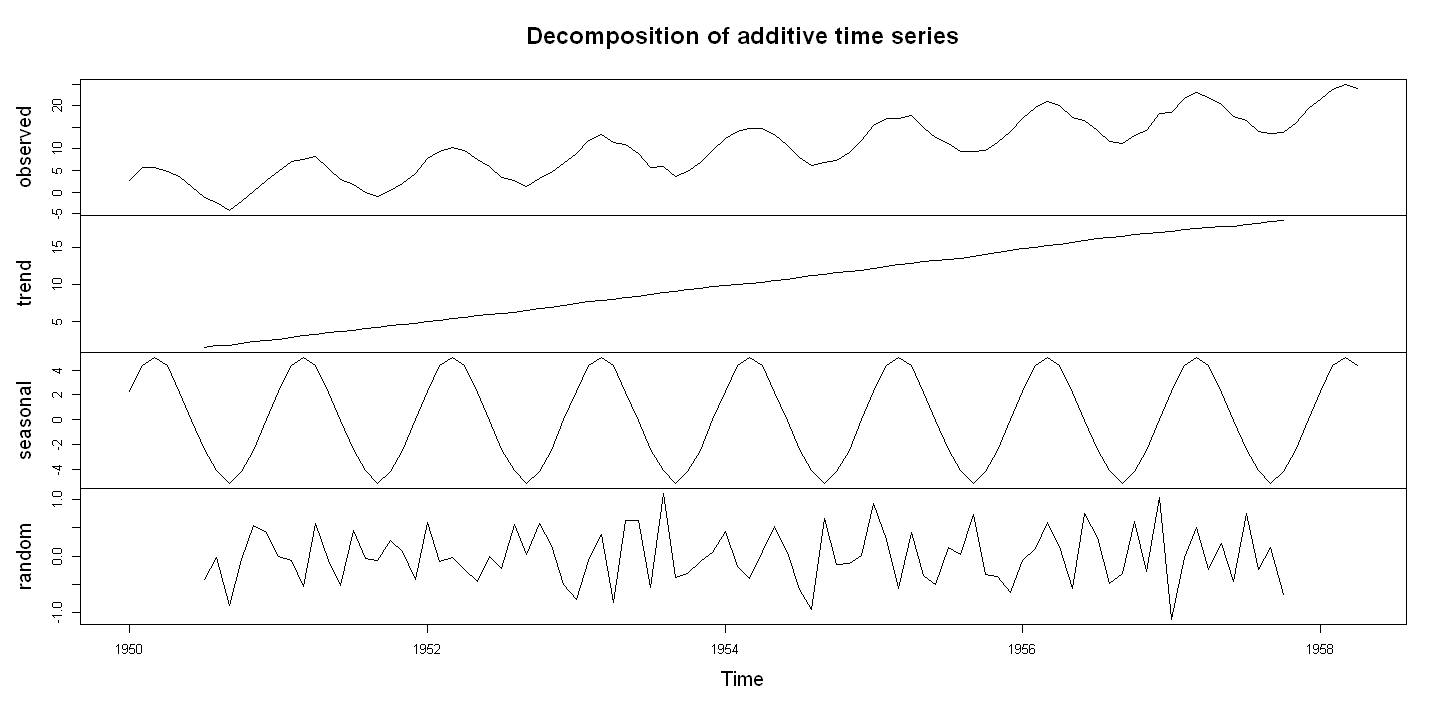

In [75]:
dc <- decompose(pl_dt, type="additive")
plot(dc)

For this purpose, I decomposed the data based on the Seasonal and Trend Decomposition using LOESS method (STL), which uses polynomial regression, allowing for forecasts to be made.

**(C) Examine the residuals and verify that there is no more trend and seasonality. Are the residuals autocorrelated?**

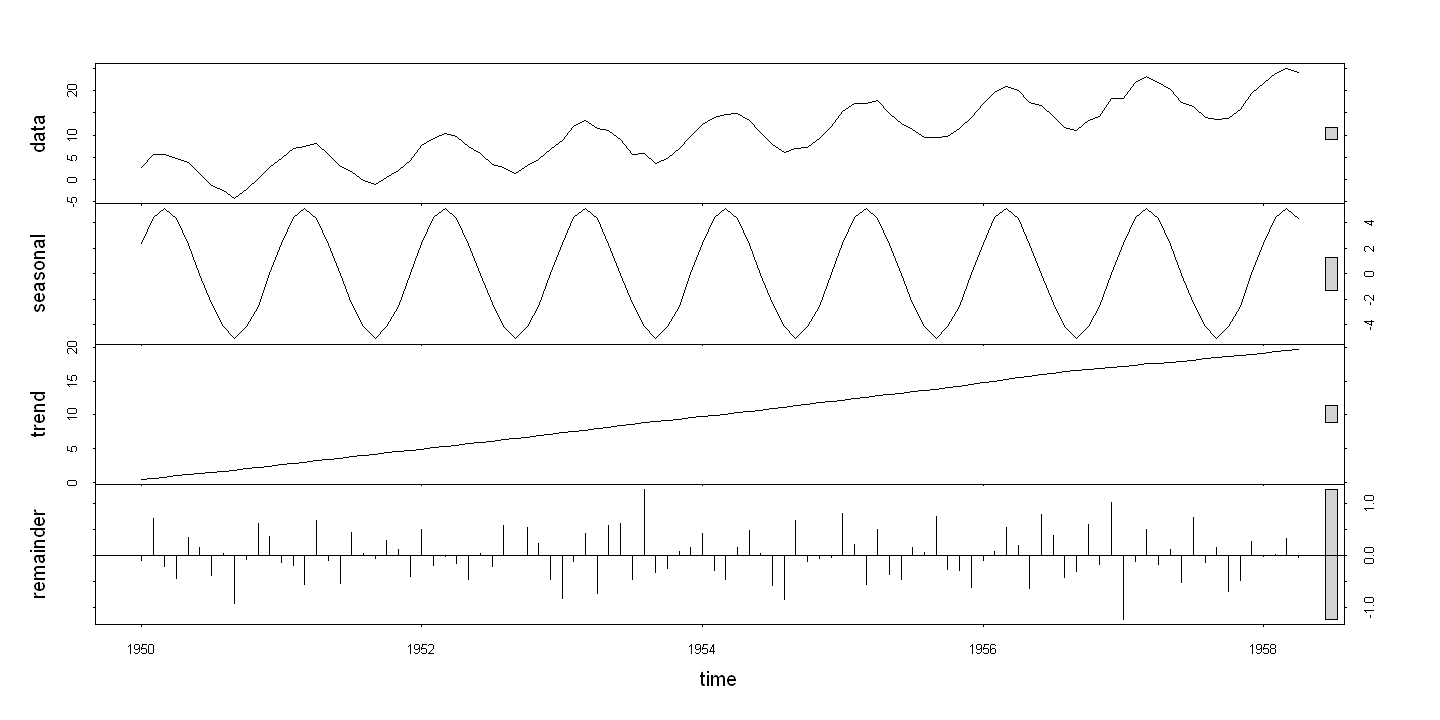

In [86]:
Plot <- stl(pl_dt, s.window="periodic", robust=TRUE)
plot(Plot)

Trend component

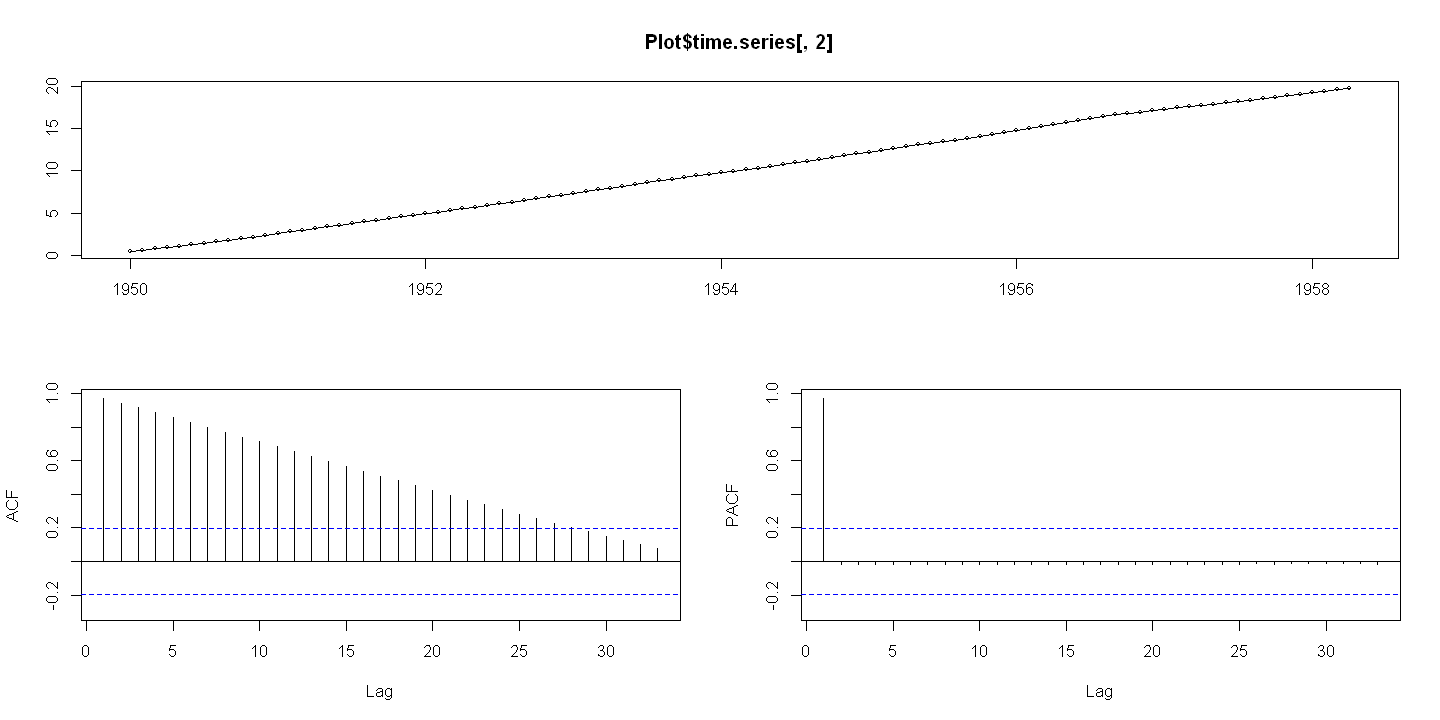

In [108]:
tsdisplay(Plot$time.series[,2])

Seasonality component

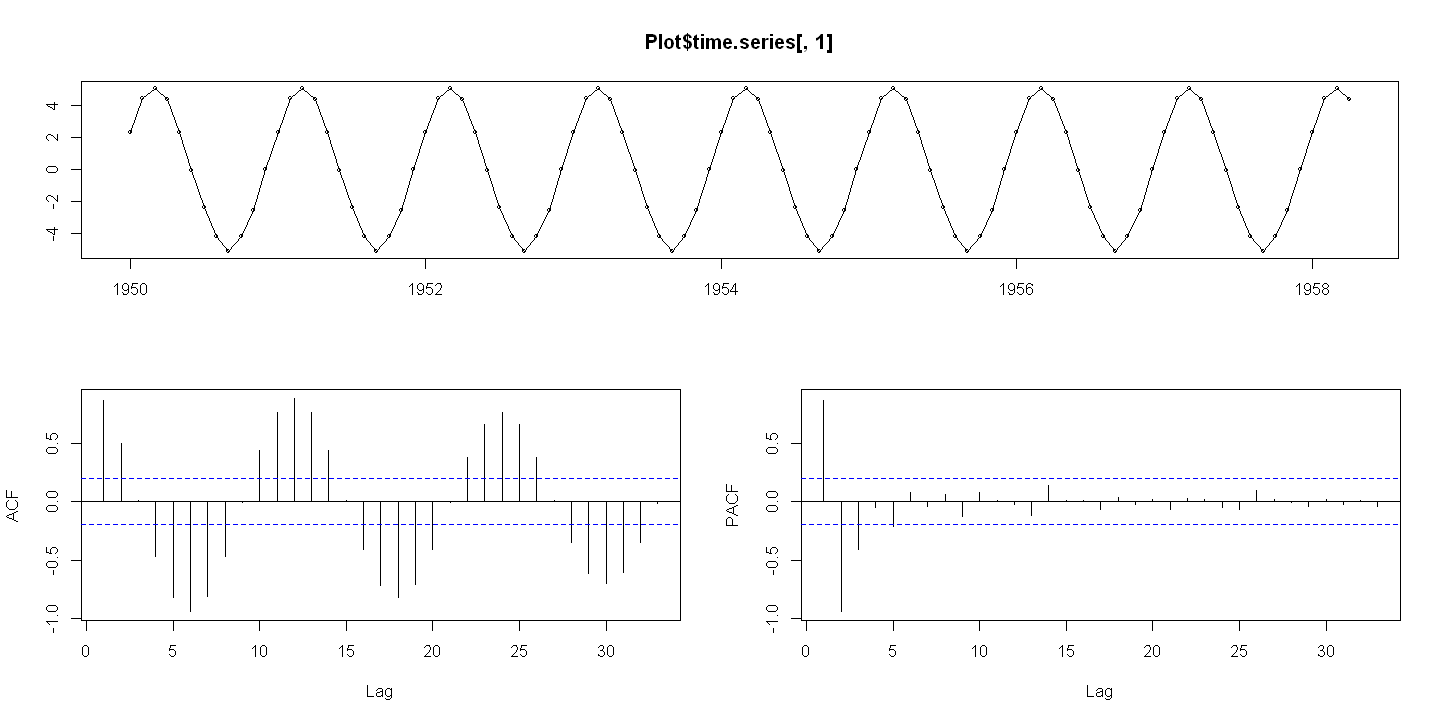

In [109]:
tsdisplay(Plot$time.series[,1])

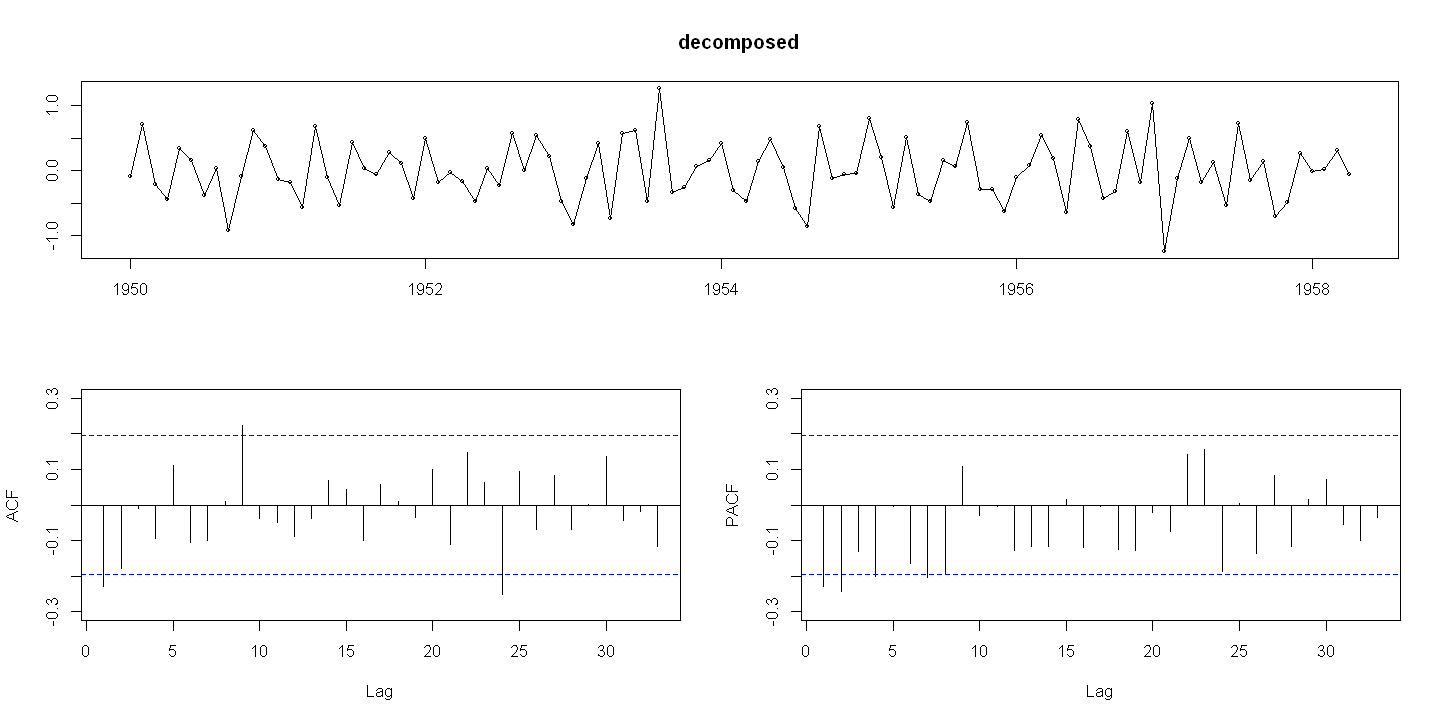

In [103]:
decomposed <- Plot$time.series[,3]
tsdisplay(decomposed)

As we can see, the residuals do not exhibit neither trend nor seasonality, but from examining the acf and pacf plots I think that the residuals have some autocorrelation, so I created a model in the next task to fix that issue.

**(D) If the residuals are autocorrelated - estimate an appropriate model for the residuals. Check whether your specified model captures all of the autocorrelation of the residuals.**

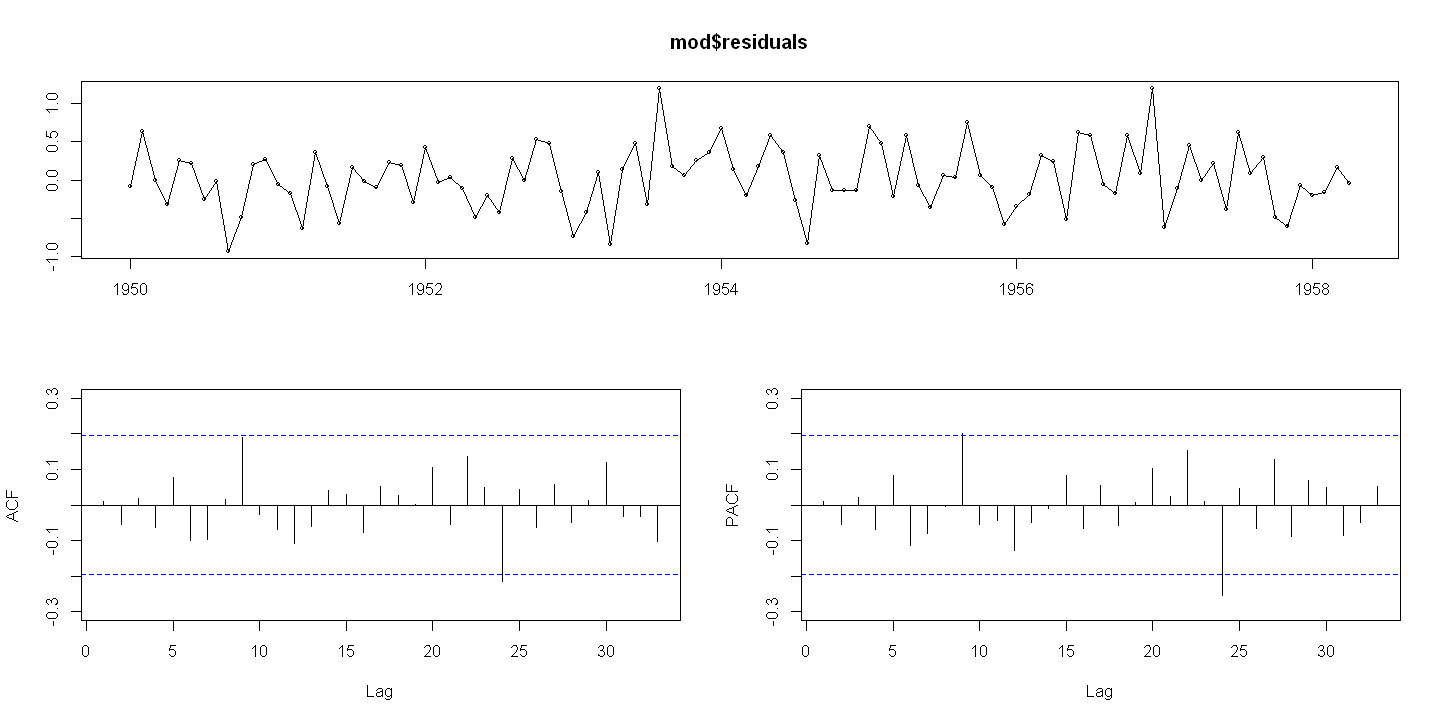

In [106]:
mod <- auto.arima(decomposed, ic="bic")
tsdisplay(mod$residuals)

From the acf and pacf plots above I think that the autocorrelation has been almost entirely eliminated, and these residuals are truly white noise.

**(E) Predict the trend, seasonal and remainder components 2 years into the future. Combine these components and plot them along with the historical series values.**

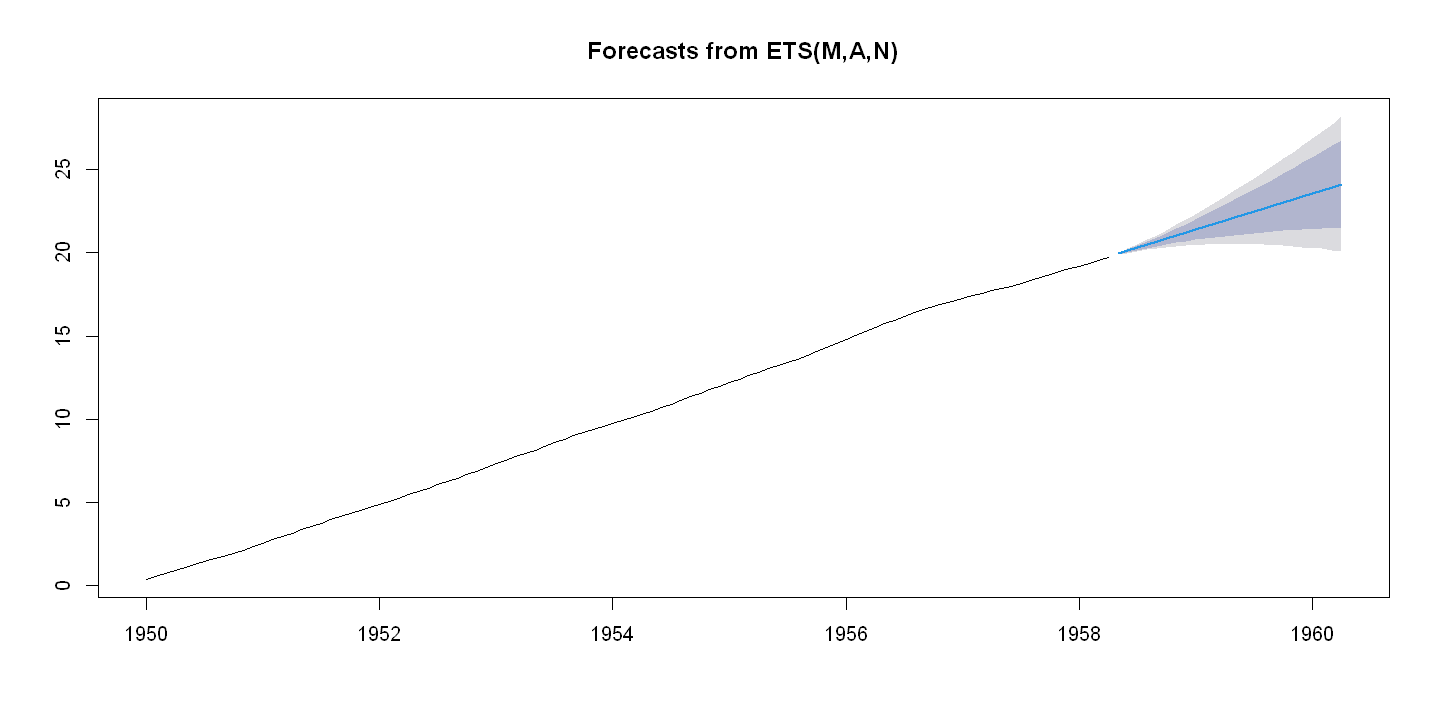

In [112]:
trend_f <- forecast(Plot$time.series[,2], h=24)
plot(trend_f)

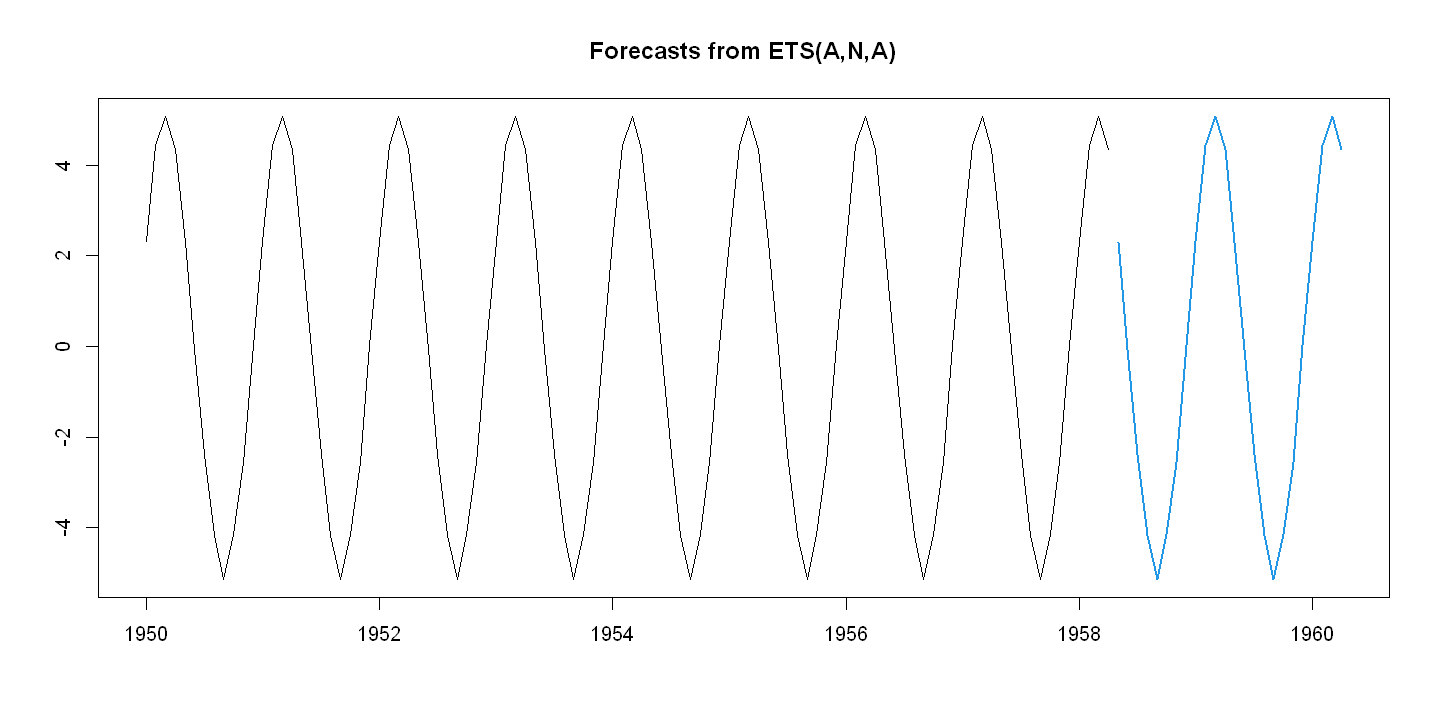

In [114]:
seasonal_f <- forecast(Plot$time.series[,1], h=24)
plot(seasonal_f)

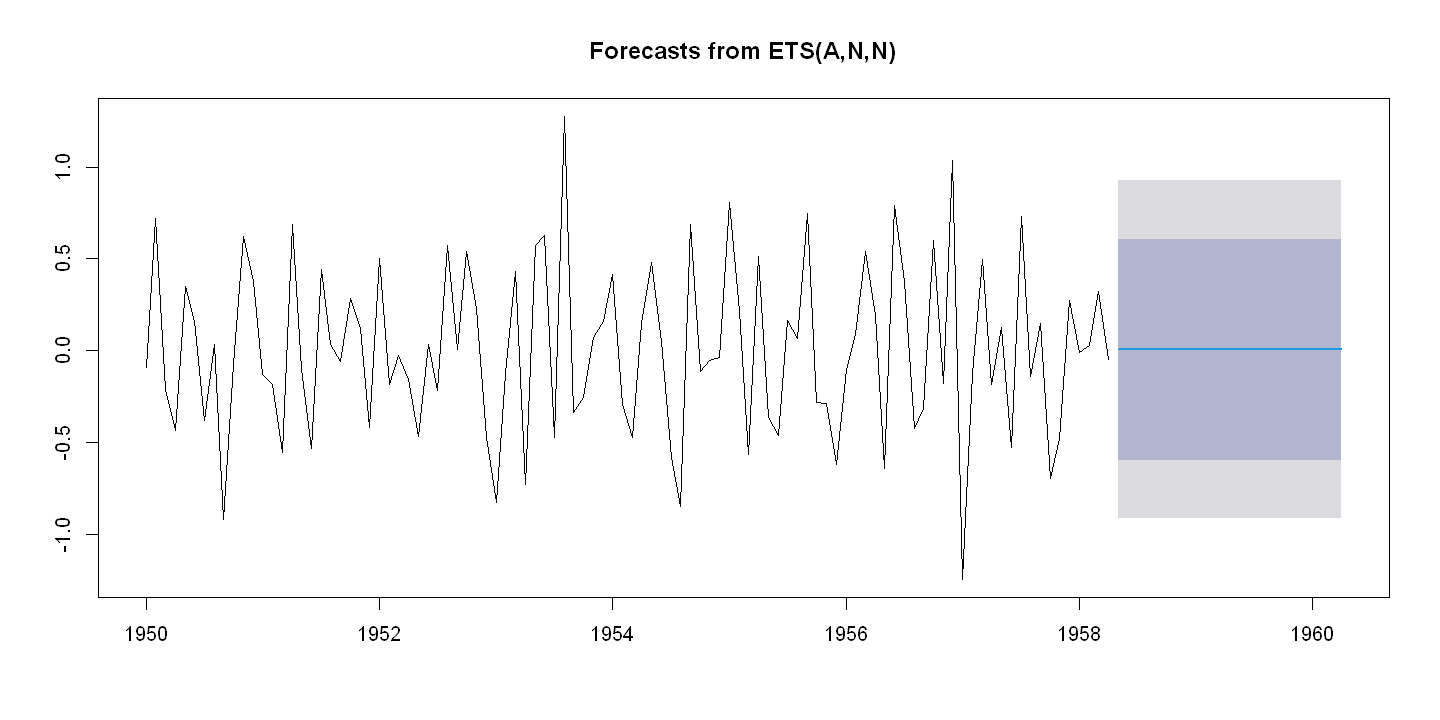

In [117]:
residual_f <- forecast(Plot$time.series[,3], h=24)
plot(residual_f)

In [130]:
combined_f <- trend_f$mean + seasonal_f$mean + residual_f$mean

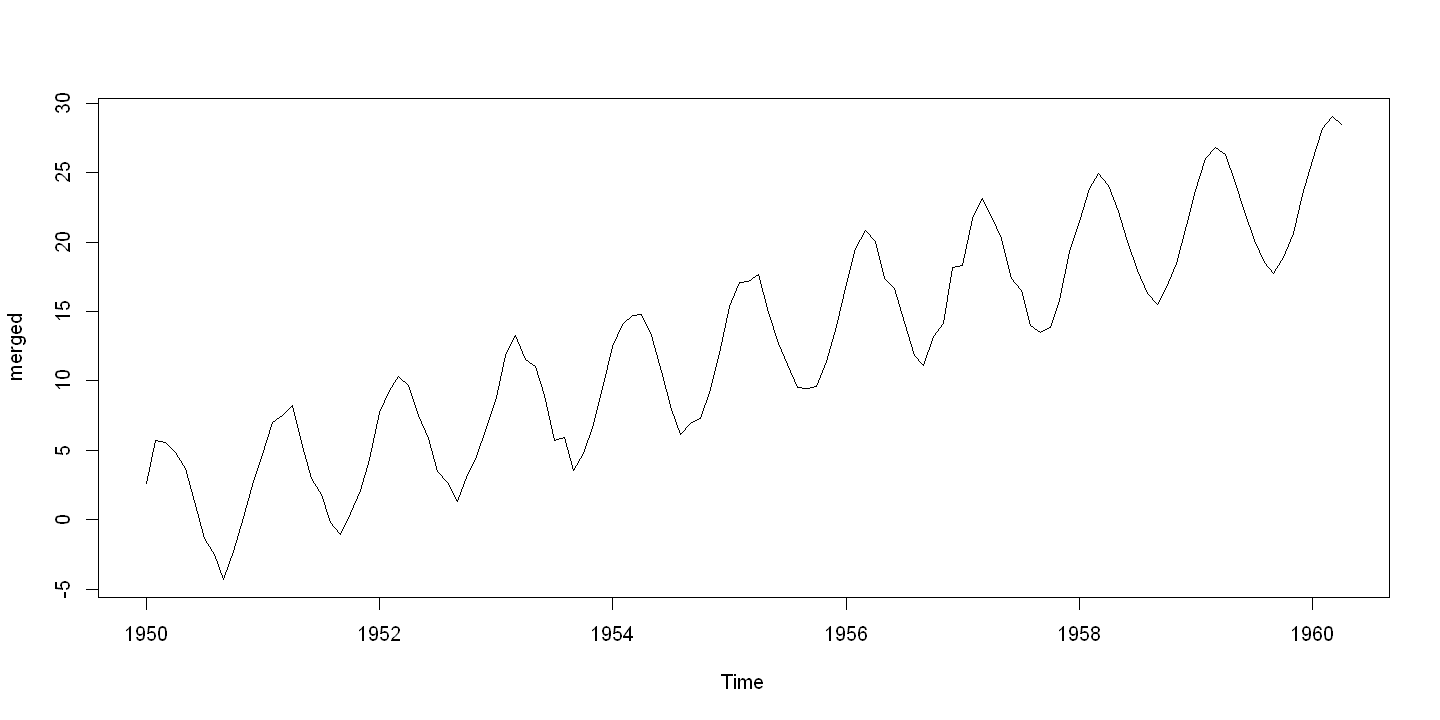

In [131]:
merged <- ts(c(pl_dt, combined_f), start=start(pl_dt), frequency=frequency(pl_dt))
plot(merged)

As it can be seen, the random spikes could not be reproduced in the predictions but the trend and seasonality are very well reproduced.

# **Task Set 3: Conditional Heteroskedastic Models**

Run the code below to get a series based on your student code

get_data <- function(s_code){
    s_name <- sample(c("NVDA", "INTC", "AMD", "FB", "MSFT",
                       "IBM", "TWTR", "NFLX", "GOOGL", "AMZN", "EBAY", "BABA",
                       "DIS", "TSLA", "KO", "PEP", "ADBE",
                       "AAL", "HPQ", "MCD", "NDAQ"), 1)
    set.seed(s_code)
    dt <- quantmod::getSymbols(s_name, auto.assign = FALSE, src = "yahoo", from = "2015-01-01", to = "2023-01-01")
    return(dt)
}
DT_3 <- get_data(STUDENT_CODE)

In [134]:
print(head(DT_3))

           AMD.Open AMD.High AMD.Low AMD.Close AMD.Volume AMD.Adjusted
2015-01-02     2.67     2.67    2.67      2.67          0         2.67
2015-01-05     2.67     2.70    2.64      2.66    8878200         2.66
2015-01-06     2.65     2.66    2.55      2.63   13912500         2.63
2015-01-07     2.63     2.65    2.54      2.58   12377600         2.58
2015-01-08     2.59     2.65    2.56      2.61   11136600         2.61
2015-01-09     2.63     2.64    2.58      2.63    8907600         2.63


Carry out the tasks below:

- **(A)** Use the closing price and calculate the **log returns**. Check whether your series has heavy tails and long memory and Taylor effect.
- **(B)** Create a model for the mean of the series. Then check whether $\rm ARCH$ effects are present in the model residuals.
- **(C)** Fit a model for the variance (if your series has no $\rm ARCH$ effects, then fit an $\rm ARCH(1)$ model for the variance equation) and estimate the mean and variance equations at the same time.
- **(D)** Analyse the standardized residuals for autocorrelation and $\rm ARCH$ effects. If $\rm ARCH$ effects are still present in your series - try one more different specification for the variance equation.

*Solutions*:

**(A) Use the closing price and calculate the log returns. Check whether your series has heavy tails and long memory and Taylor effect.**

In [136]:
close <- DT_3$AMD.Close

In [137]:
log_returns <- diff(log(close))

In [153]:
log_returns <- log_returns[!is.na(log_returns)]

In [154]:
library(fBasics)
install.packages("evir")
library(evir)

Warning message:
"package 'evir' is in use and will not be installed"


In [156]:
library(fracdiff)

fracdiff_test <- fracdiff(log_returns)
d_value <- fracdiff_test$d
print(d_value)

[1] 4.583013e-05


The d value is bigger than 0, so the time series has long memory.